In [5]:
import utils
import glob
import numpy as np
import matplotlib.pyplot as plt


/home/users/r/rocher/Code_NERSC/4MOST/4MOST_CRS_tools/CRStools/utils.py:1043: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


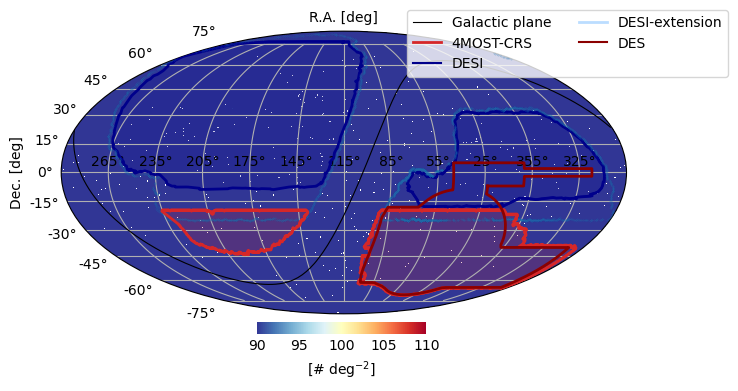

In [4]:
# Generate random sky Catalog
ra, dec = utils.random_point_on_sky(1000000)

# Create healpix map
hpmap = utils.create_hp_map(ra, dec, nside=128)

# plot Sky map
utils.plot_moll(hpmap, rot=115, min=100, max=100, desi_footprint_ext=True,desi_footprint=True, fourmost_footprint=True, des_footprint=True)

ok lsst


/home/users/r/rocher/Code_NERSC/4MOST/4MOST_CRS_tools/CRStools/utils.py:1029: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


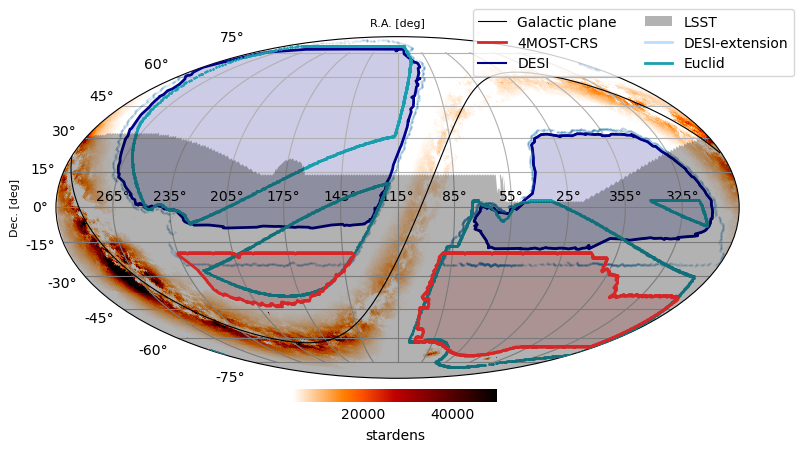

In [11]:
import fitsio
import utils

tt = fitsio.FITS('data/pixweight-dr10-128-new.fits')[1]
stardens = tt['STARDENS'][:]
utils.plot_moll(stardens, rot=115, min=4000, max=50000, cmap='gist_heat_r', desi_footprint=True, label='stardens', lsst_fp=True, fourmost_footprint=True, euclid_fp=True, nest=True, figsize=(8,4), desi_footprint_ext=True, fontsize=8)
    

In [4]:
#Select point inside the 4MOST footprint
mask_s8fp = utils.get_4most_s8foot(ra, dec)

/home/users/r/rocher/Code_NERSC/4MOST/4MOST_CRS_tools/CRStools/utils.py:1029: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


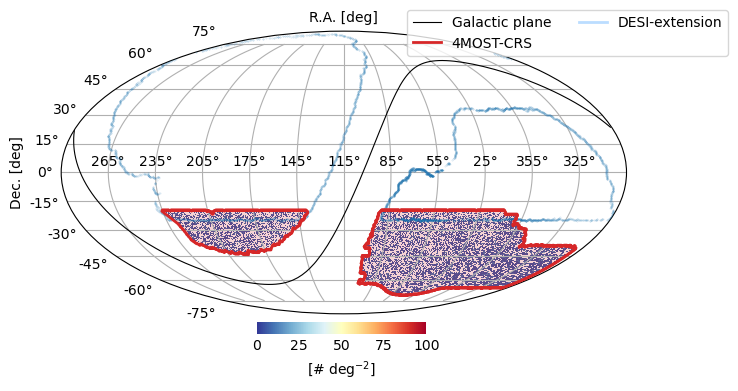

In [6]:

hpmap = utils.create_hp_map(ra[mask_s8fp], dec[mask_s8fp], nside=128)

# plot Sky map 
utils.plot_moll(hpmap, rot=115, min=0, max=100, desi_footprint_ext=True, fourmost_footprint=True)

In [7]:
utils.get_4most_skyaera()

Area ngc: 1442.5417995619432
Area sgc: 4299.561009147849
Total area: 5742.102808709793
